<a href="https://colab.research.google.com/github/ayushs0911/Projects/blob/main/Sentiment_Analysis_Amazon_Alexa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement 
Based on reviews, predicting whether customers are satisfied with the product or not. 

- Natural Language processing can be used to build predictive models to perform sentiment analysis on social media posts and reviews and predict if customers are happy or not. 
- It works by converting words into numbers and training a ML models to make predictions 

This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc. for learning how to train Machine for sentiment analysis.

https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews/code

##Import Libraries and Datasets 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
#Mounting google drive to import data

from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
reviews_df = pd.read_csv('/content/drive/MyDrive/Datasets/amazon_alexa.tsv', sep = '\t')

In [ ]:
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
reviews_df.verified_reviews

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

## Exploring Dataset 

<Axes: >

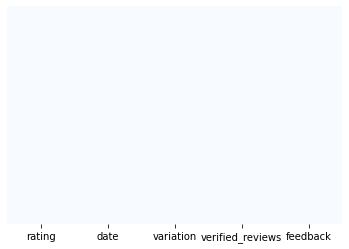

In [ ]:
sns.heatmap(reviews_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

Lucikly, no data is missing. 

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

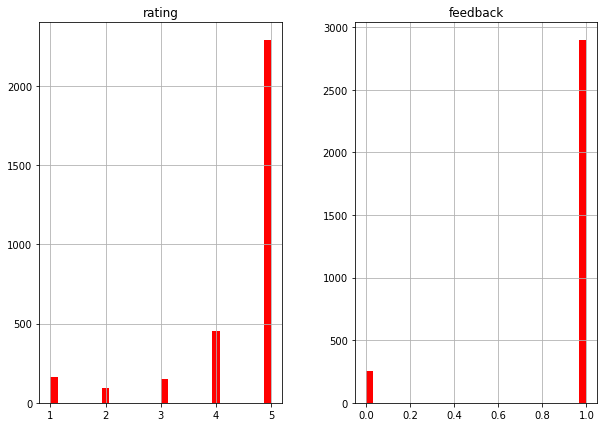

In [ ]:
reviews_df.hist(bins = 30, figsize = (10,7), color = 'r')

In [ ]:
positive = reviews_df[reviews_df['feedback'] == 1]
len(positive) 

2893

In [ ]:
positive[:10]

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [ ]:
negative = reviews_df[reviews_df['feedback'] == 0]
len(negative)

257

In [ ]:
negative[:10]

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
187,2,29-Jul-18,Charcoal Fabric,Really disappointed Alexa has to be plug-in to...,0
205,2,29-Jul-18,Sandstone Fabric,It's got great sound and bass but it doesn't w...,0
233,2,29-Jul-18,Sandstone Fabric,I am not super impressed with Alexa. When my P...,0
299,2,29-Jul-18,Charcoal Fabric,Too difficult to set up. It keeps timing out ...,0
341,1,28-Jul-18,Charcoal Fabric,Alexa hardly came on..,0


<Axes: xlabel='rating', ylabel='count'>

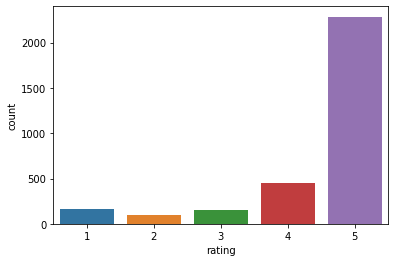

In [ ]:
sns.countplot(x = reviews_df.rating)

<Axes: xlabel='variation', ylabel='rating'>

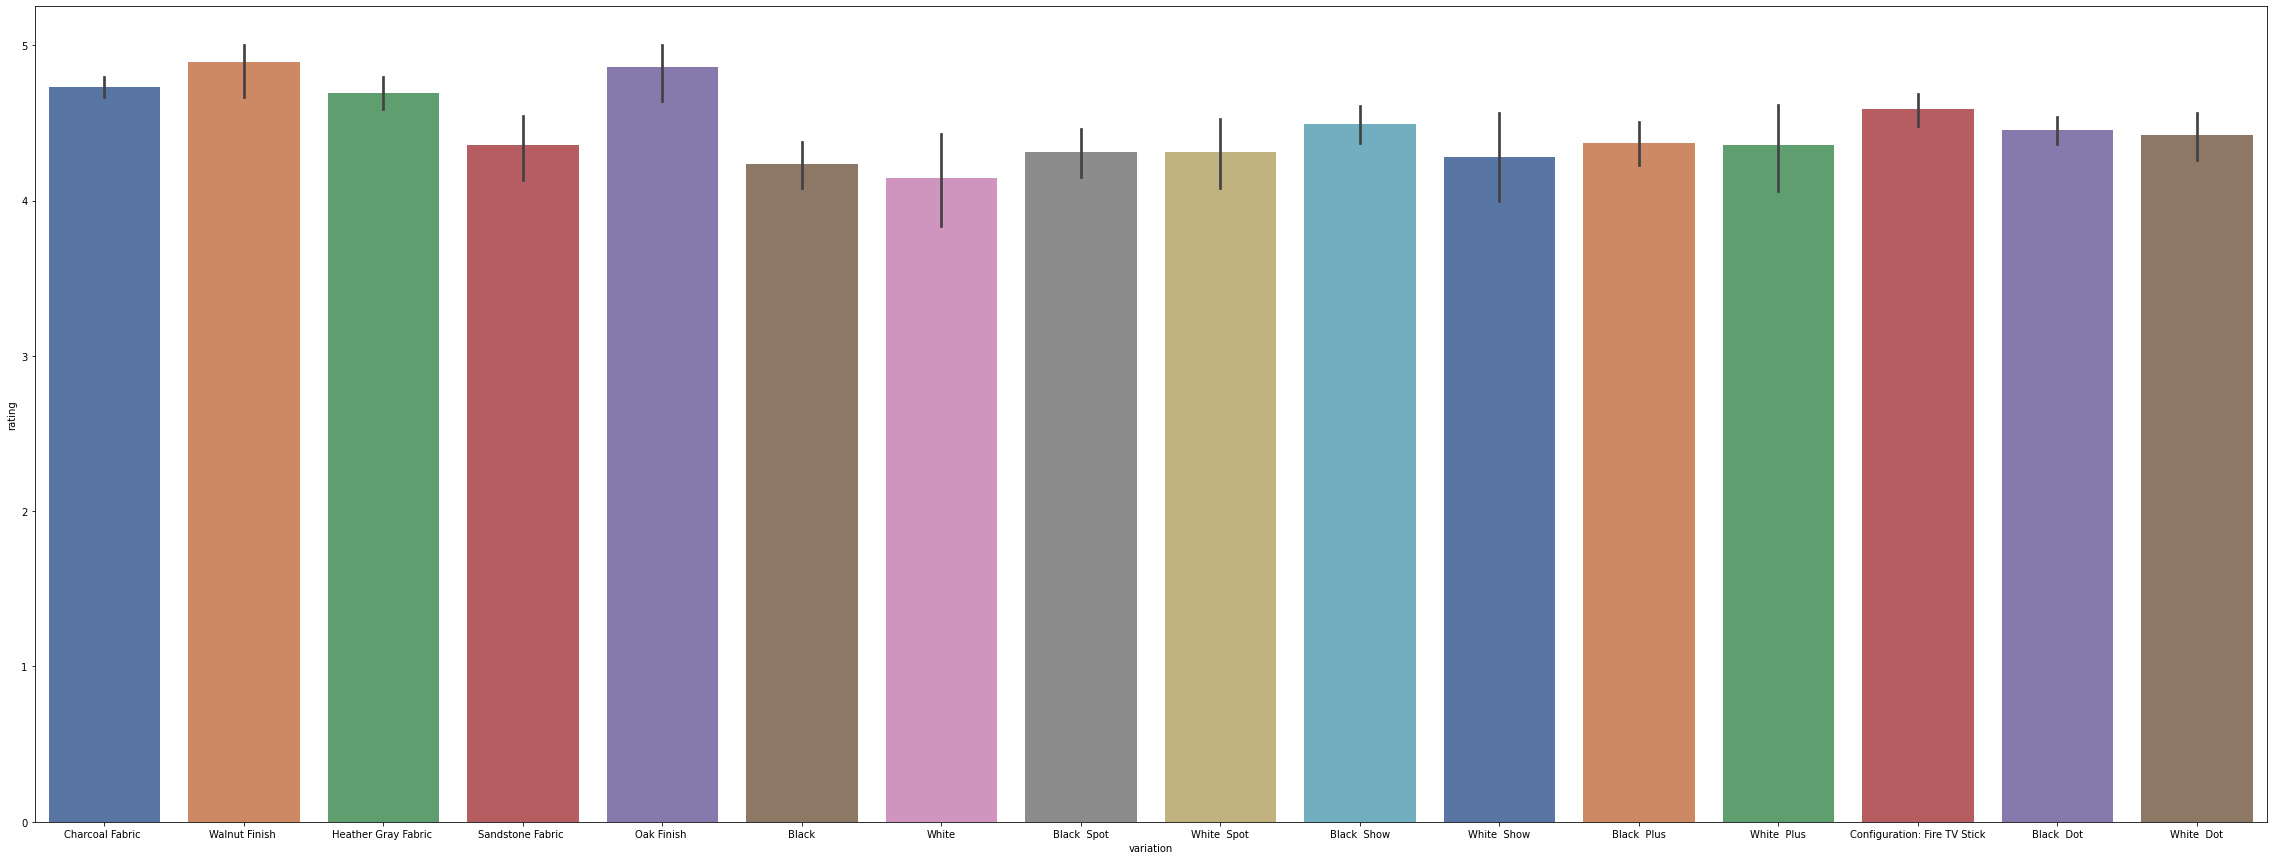

In [ ]:
plt.figure(figsize = (40,15))
sns.barplot(x = reviews_df.variation, y = reviews_df.rating, palette = 'deep')

In [ ]:
positive_sentances = positive['verified_reviews'].tolist()
positive_sentances_as_one_string = " ".join(positive_sentances)

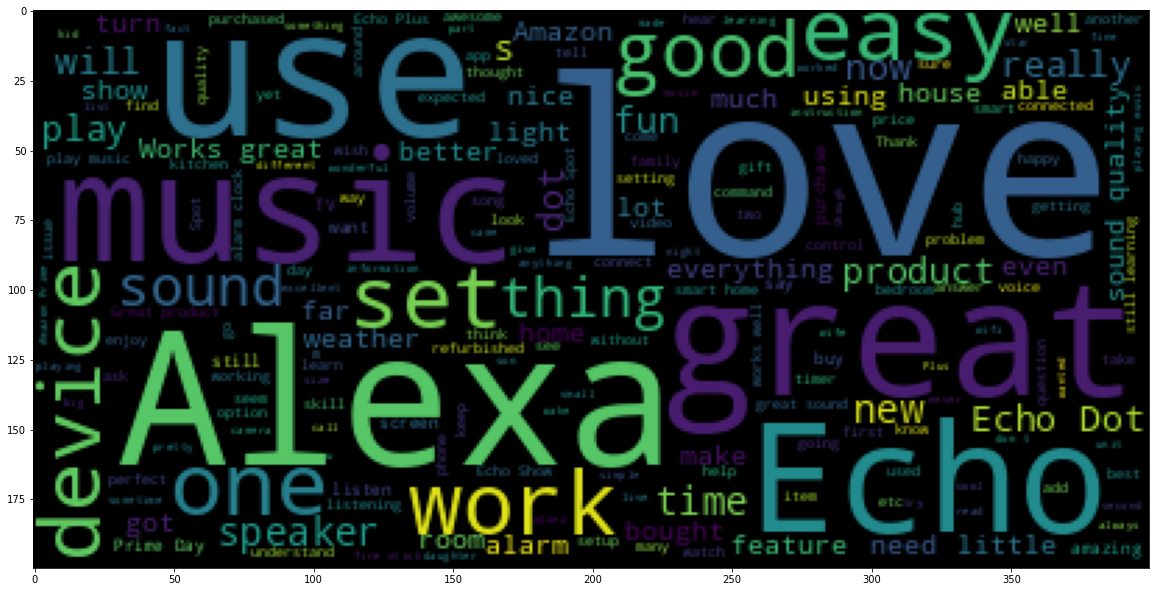

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(positive_sentances_as_one_string))


In [ ]:
negative_sentances = negative['verified_reviews'].tolist()
negative_sentances_as_one_string = " ".join(negative_sentances)

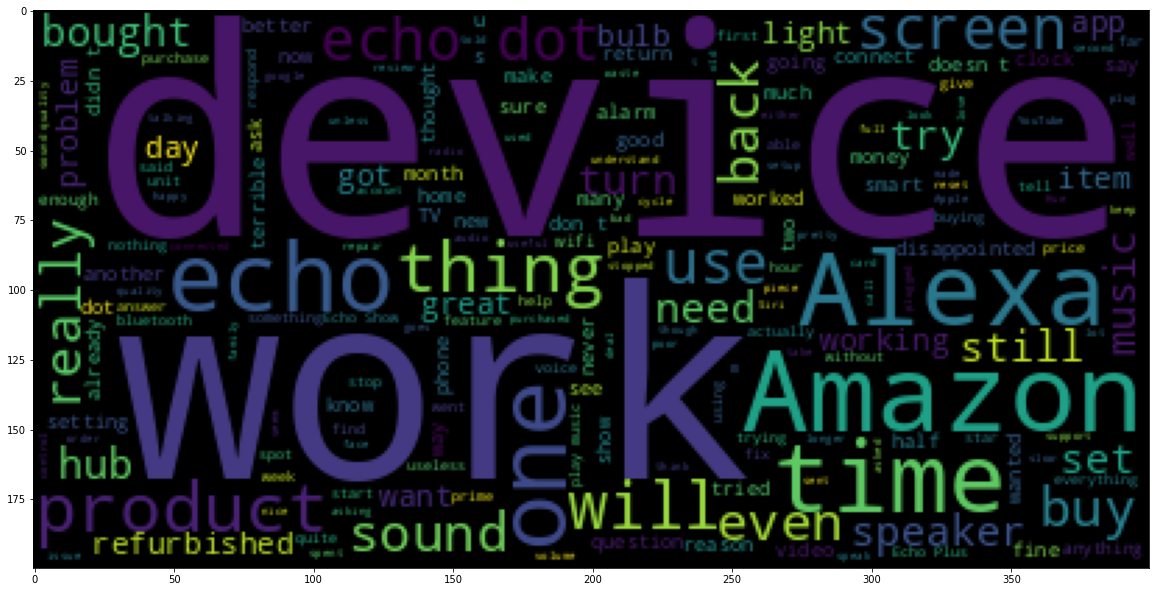

In [ ]:
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(negative_sentances_as_one_string))

## Data Cleaning 

In [ ]:
#let's keep only reviews and feedback and drop everything else. 
sentances = reviews_df.drop(['date', 'rating', 'variation'], axis =1)
sentances.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


### Removing Punctuation 


In [ ]:
import string 
def message_cleaning(message):
  punc_remove = [char for char in message if char not in string.punctuation]
  punc_remove = "".join(punc_remove)
  return punc_remove


In [ ]:
clean_reviews = reviews_df['verified_reviews'].apply(message_cleaning)

In [ ]:
clean_reviews[:10]

0                                         Love my Echo
1                                             Loved it
2    Sometimes while playing a game you can answer ...
3    I have had a lot of fun with this thing My 4 y...
4                                                Music
5    I received the echo as a gift I needed another...
6    Without having a cellphone I cannot use many o...
7    I think this is the 5th one Ive purchased Im w...
8                                          looks great
9    Love it I’ve listened to songs I haven’t heard...
Name: verified_reviews, dtype: object

In [ ]:
clean_sentances = pd.concat([clean_reviews, sentances['feedback']], axis =1)

In [ ]:
clean_sentances 

,verified_reviews,feedback
0,Love my Echo,1
1,Loved it,1
2,Sometimes while playing a game you can answer ...,1
3,I have had a lot of fun with this thing My 4 y...,1
4,Music,1
...,...,...
3145,Perfect for kids adults and everyone in between,1
3146,Listening to music searching locations checkin...,1
3147,I do love these things i have them running my ...,1
3148,Only complaint I have is that the sound qualit...,1


Data is cleaned and ready for deep learning process. 

Splitting the data into Train, validation and test splits. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_sentances['verified_reviews'],
                                                    clean_sentances['feedback'],
                                                    test_size = 0.1,
                                                    random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                    y_train,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test), len(X_val), len(y_val)

(2268, 2268, 315, 315, 567, 567)

In [ ]:
train_sentances = X_train.tolist()
val_sentances = X_val.tolist()
test_sentances = X_test.tolist()

In [ ]:
train_sentances[:10]

['I like the volume up and down on the top so I can turn it down quickly',
 'So far it has been fun to use and learn how to deal with Alexa I am still learning and finding out what can really be done plus I am in the process of making my house a smart house so there is no much to control with Alexa yet',
 'not working',
 'Excellent product set up with ease as well',
 'We love using it for bedtime reading on Audible Its very kidfriendly and I can see liking it in the kitchen while Im cooking since its small and unobtrusive We like it better than our Echo Dot',
 'Like it Still working discovery Really too soon to fully evaluate But looking forward to learning and using it',
 'this is my first Alexa enabled device and so far its lived up to its reputation',
 'Very impressed  Simple to use',
 'I having it in my living room Music sounds really good in my living room  I can hear it upstairs',
 'Love my dots  Easy to use  I have two plus the Echo Spot  One of my favorite features is the abili

## Creating a series of model experiments 
We've processed our data, it's time to setup a series of modelling experiments. 
For each model, we'll train it on the training data and evaluate it on the validation data. 

### Model 0: Getting a baseline 
Our first model will be a TF-IDF Multinomial Naive Bayes. <br>
To build it, we'll create a Scikit-Learn `Pipeline` which uses the `TfidVectorizer` class to convert our abstract sentances to numbers using the TF-IDF(term frequency-inverse document frequency) algorithm and then learns to classify our sentances using the `MultinomialNB`

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline 

#create a pipeline
model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])
model_0.fit(X = train_sentances, 
            y = y_train)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
#evaluate baseline on validation dataset 
model_0.score(X=val_sentances,
              y = y_val)

0.9382716049382716

In [ ]:
#make predictions 
baseline_preds = model_0.predict(val_sentances)

### Helper Functions
I've made a series of helper functions which can be beneficial in various tasks. So instead of rewriting them again and again, I'll import [helper_functions.py](https://raw.githubusercontent.com/ayushs0911/Projects/main/helper_functions.py) file from github.

In [ ]:
import os 
if not os.path.exists('helper_functions.py'):
  !wget https://raw.githubusercontent.com/ayushs0911/Projects/main/helper_functions.py
else:
  print("[INFO] 'helper_functions.py' already exists.skipping download.")

--2023-03-21 04:58:01--  https://raw.githubusercontent.com/ayushs0911/Projects/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-21 04:58:01 (97.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

In [ ]:
baseline_results = calculate_results(y_true = y_val,
                                     y_pred = baseline_preds)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
baseline_results

{'accuracy': 93.82716049382715,
 'precision': 0.8803536046334399,
 'recall': 0.9382716049382716,
 'f1': 0.9083903436345049}

### Preparing data for deep sequence models 
We've got to create vectorization and embedding layers.

The vectorization layer will convert our text to numbers and the embedding layer will capture the relationships between those numbers.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

Let's write some code to find the average length of sentences in the training set.



In [ ]:
#how long is each sentance on average?
sent_lens = [len(sentance.split()) for sentance in train_sentances]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

24.719135802469136

How about the distribution of sentence lengths?



(array([1907.,  262.,   65.,   20.,    7.,    4.,    3.]),
 array([  0.        ,  43.85714286,  87.71428571, 131.57142857,
        175.42857143, 219.28571429, 263.14285714, 307.        ]),
 <BarContainer object of 7 artists>)

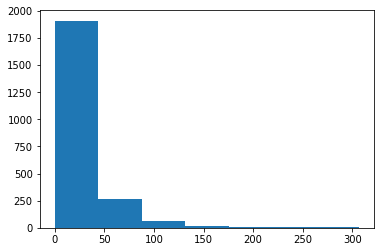

In [ ]:
#what'd the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins = 7)

Majority of sentances are b/w 0 and 50 tokens in length. 

Using `percentile` to find the value which covers 95% of sentance lenghts. 

In [ ]:
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

83

In [ ]:
# Maximum sentence length in the training set
max(sent_lens)

307

### Create Text Vectorizer

We'll keep all the parameters default except for `max_tokens` (the number of unique words in our dataset) and `output_sequence_length` (our desired output length for each vectorized sentence)



In [ ]:
#How many words are in our vocabulary?
max_tokens = 40000

and since we discovered a sentance length of 83 covers 95% of training sentances, we'll use that as `output_sequence_length` parameter

In [ ]:
# Create text vectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens, # number of words in vocabulary
                                    output_sequence_length=83) # desired output length of vectorized sequences

Let's adapt it to the training data (let it read the training data and figure out what number should represent what word) and then test it out

In [ ]:
#adapt text vectorizer to training sentances 
text_vectorizer.adapt(train_sentances)

In [ ]:
import random 
target_sentance = random.choice(train_sentances)
print(f"Text:\n {target_sentance}")
print(f"\nLengh of text : {len(target_sentance.split())}")
print(f"\nVectorized text :\n{text_vectorizer([target_sentance])}")

Text:
 Love our Fire Stickeasy to set up and have loads of shows for free and plenty to rent or buyWe also use Pluto TV and Tubi so thats even more TVAlexa makes it so easy to find any show or movie I wantWe love the money we save

Lengh of text : 48

Vectorized text :
[[  11   68  194 2459    4   44   29    6   16  990   14  215   10  433
     6  968    4 1680   53 3678   82   32 2789  112    6 2330   22  464
   105   43 2328  252    5   22   38    4  195  111   90   53  685    3
  2249   11    2  236   33  721    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


In [ ]:
#how many words in our training vocabulary?
train_vocab = text_vectorizer.get_vocabulary()

In [ ]:
print(f"Number of words in vocabulary: {len(train_vocab)}"), 
print(f"Most common words in the vocabulary: {train_vocab[:5]}")
print(f"Least common words in the vocabulary: {train_vocab[-5:]}")

Number of words in vocabulary: 3961
Most common words in the vocabulary: ['', '[UNK]', 'the', 'i', 'to']
Least common words in the vocabulary: ['150', '129', '100x', '1000', '072318']


### Create custom text embedding 
Our token_vectorization layer maps the words in our text directly to numbers. However, this doesn't necessarily capture the relationships between those numbers.

To create a richer numerical representation of our text, we can use an embedding.

We can create it using TensorFlow's `Embedding` layer.

 
The `input_dim` parameter defines the size of our vocabulary. And the `output_dim` parameter defines the dimension of the embedding output.
 

In [ ]:
#create token embedding layer 
token_embed = layers.Embedding(input_dim = len(train_vocab), #length of vocabulary
                               output_dim = 128,
                               mask_zero = True,#use masking to handle variable sequence lengths 
                               name = "token_embedding")

print(f"Sentance before vectorization :\n{target_sentance}")
vectorized_sentance = text_vectorizer([target_sentance])
print(f"Sentance after vectorization:\n{vectorized_sentance}")
embedded_sentance = token_embed(vectorized_sentance)
print(f"Sentance after embedding:\n {embedded_sentance}")
print(f"Embedded sentance shape : {embedded_sentance.shape}")

Sentance before vectorization :
Love our Fire Stickeasy to set up and have loads of shows for free and plenty to rent or buyWe also use Pluto TV and Tubi so thats even more TVAlexa makes it so easy to find any show or movie I wantWe love the money we save
Sentance after vectorization:
[[  11   68  194 2459    4   44   29    6   16  990   14  215   10  433
     6  968    4 1680   53 3678   82   32 2789  112    6 2330   22  464
   105   43 2328  252    5   22   38    4  195  111   90   53  685    3
  2249   11    2  236   33  721    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]
Sentance after embedding:
 [[[-0.02158835 -0.03828613 -0.01442307 ... -0.02611554  0.04749212
    0.00044399]
  [ 0.00879587  0.01951018  0.0083623  ...  0.00572375  0.03712693
   -0.03744817]
  [-0.02835245 -0.03761758 -0.00685834 ...  0.02030781  0.00572366
    0.0357101 ]
  ...
  [

## Create datasets 
To create a batched `PrefetchDataset` we can use the methods `batch()` and `prefetch()`, the parameter `tf.data.AUTOTUNE` will also allow TensorFlow to determine the optimal amount of compute to use to prepare datasets.

In [ ]:
# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentances, y_train))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentances, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentances, y_test))

train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

## Model 1 : Conv1D with token Embeddings 


In [ ]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64, kernel_size =5, padding = 'same', activation = 'relu')(token_embeddings)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
# Get summary of Conv1D model
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 83)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 83, 128)          507008    
                                                                 
 conv1d (Conv1D)             (None, 83, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 65    

In [ ]:
#fit the model
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch = len(train_dataset), # only fit on 10% of batches for faster training time
                              epochs=3,
                              validation_data = valid_dataset,
                              validation_steps=int (0.1*len(valid_dataset)))

Epoch 1/3
71/71 [==============================] - 3s 28ms/step - loss: 0.3292 - accuracy: 0.9149 - val_loss: 0.1615 - val_accuracy: 0.9688
Epoch 2/3
71/71 [==============================] - 2s 26ms/step - loss: 0.2612 - accuracy: 0.9149 - val_loss: 0.1461 - val_accuracy: 0.9688
Epoch 3/3
71/71 [==============================] - 2s 34ms/step - loss: 0.2212 - accuracy: 0.9220 - val_loss: 0.1257 - val_accuracy: 0.9688


In [ ]:
model_1.evaluate(valid_dataset)

18/18 [==============================] - 0s 11ms/step - loss: 0.1697 - accuracy: 0.9418


[0.1696723997592926, 0.9417989253997803]

In [ ]:
model_1_pred_probs = model_1.predict(valid_dataset)
# Convert pred probs to classes
model_1_preds = tf.round(model_1_pred_probs)

18/18 [==============================] - 0s 12ms/step


In [ ]:
# Calculate model_1 results
model_1_results = calculate_results(y_true=y_val,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 94.17989417989418,
 'precision': 0.9275764177724961,
 'recall': 0.9417989417989417,
 'f1': 0.9219877499171454}

## Model 2 : Feature extraction with pretrained token embeddings

Let's see what results we can get with the pretrained Universal Sentence Encoder embeddings from TensorFlow Hub.
-  The pretrained USE module from TensorFlow Hub takes care of tokenizing our text for us and outputs a 512 dimensional embedding vector.


In [ ]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [ ]:
# Define feature extractor model using TF Hub layer
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text and create embedding
x = layers.Dense(128, activation="relu")(pretrained_embedding) # add a fully connected layer on top of the embedding

outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer
model_2 = tf.keras.Model(inputs=inputs,
                        outputs=outputs)

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
# Get a summary of the model
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit feature extractor model for 3 epochs
model_2.fit(train_dataset,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            epochs=3,
            validation_data=valid_dataset,
            validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
7/7 [==============================] - 4s 98ms/step - loss: 0.6144 - accuracy: 0.8973 - val_loss: 0.5174 - val_accuracy: 0.9688
Epoch 2/3
7/7 [==============================] - 0s 18ms/step - loss: 0.4813 - accuracy: 0.9330 - val_loss: 0.3850 - val_accuracy: 0.9688
Epoch 3/3
7/7 [==============================] - 0s 19ms/step - loss: 0.3700 - accuracy: 0.9286 - val_loss: 0.2809 - val_accuracy: 0.9688


In [ ]:
# Evaluate on whole validation dataset
model_2.evaluate(valid_dataset)

18/18 [==============================] - 0s 15ms/step - loss: 0.3164 - accuracy: 0.9383


[0.3164316713809967, 0.9382715821266174]

In [ ]:
# Make predictions with feature extraction model
model_2_pred_probs = model_2.predict(valid_dataset)
# Convert the predictions with feature extraction model to classes
model_2_preds = tf.round(model_2_pred_probs)
model_2_results = calculate_results(y_true=y_val,
                                    y_pred=model_2_preds)
model_2_results

18/18 [==============================] - 1s 15ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 93.82716049382715,
 'precision': 0.8803536046334399,
 'recall': 0.9382716049382716,
 'f1': 0.9083903436345049}

##Model 3 : Conv1D with character embeddings
Character embeddings split sequences into characters and creates a feature vector for each. 

In [ ]:
def split_chars(text):
  return " ".join(list(text))

Create character level datasets by splitting our sequence datasets into characters. 

In [ ]:
train_chars = [split_chars(sentance) for sentance in train_sentances]
val_chars = [split_chars(sentance) for sentance in val_sentances]
test_chars = [split_chars(sentance) for sentance in test_sentances]
train_chars[0]

'I   l i k e   t h e   v o l u m e   u p   a n d   d o w n   o n   t h e   t o p   s o   I   c a n   t u r n   i t   d o w n   q u i c k l y'

In [ ]:
#average character length 
char_lens = [len(sentance) for sentance in train_sentances]
mean_char_len = np.mean(char_lens)
mean_char_len

125.7742504409171

(array([1924.,  253.,   57.,   22.,    6.,    4.,    2.]),
 array([1.00000000e+00, 2.35571429e+02, 4.70142857e+02, 7.04714286e+02,
        9.39285714e+02, 1.17385714e+03, 1.40842857e+03, 1.64300000e+03]),
 <BarContainer object of 7 artists>)

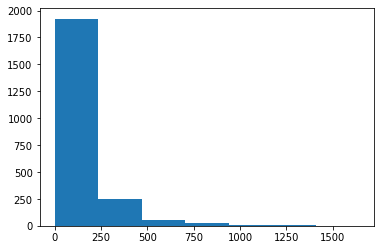

In [ ]:
plt.hist(char_lens, bins = 7)

In [ ]:
output_seq_char_len = int(np.percentile(char_lens, 90))
output_seq_char_len

301


Now we know the sequence length which covers 90% of sequences, we'll use that in our TextVectorization layer as the `output_sequence_length `parameter.

We'll set `max_tokens` (the total number of different characters in our sequences) to 28, in other words, 26 letters of the alphabet + space + OOV (out of vocabulary or unknown) tokens.

In [ ]:
# create char-level token vectorizer instance 

NUM_CHAR_TOKENS = 28
char_vectorizer = TextVectorization(max_tokens = NUM_CHAR_TOKENS,
                                    output_sequence_length = output_seq_char_len,
                                    standardize = 'lower_and_strip_punctuation',
                                    name = 'char_vectorizer')
char_vectorizer.adapt(train_chars)

Let's check out some characteristics about it using `get_vocabulary()` method. 

In [ ]:
char_vocab = char_vectorizer.get_vocabulary()
print(f" No. of diffrent characters in character vocab :{len(char_vocab)} ")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

 No. of diffrent characters in character vocab :28 
5 most common characters: ['', '[UNK]', 'e', 't', 'o']
5 least common characters: ['k', 'x', 'z', 'j', '’']


**Creating a character-level embedding** <br>
Using `tensorflow.keras.layers.Embedding` class. 

In [ ]:
# create char embedding layer 
char_embed = layers.Embedding(input_dim = NUM_CHAR_TOKENS,
                              output_dim = 25,
                              mask_zero = False,
                              name = 'char_embed')

**Builfing a Conv1D model to fit on character embeddings** <br>
The model will have the same structure as our custom token embedding model (`model_1`) except it'll take character-level sequences as input instead of token-level sequences.

In [ ]:
input = layers.Input(shape = (1,), dtype = tf.string)
char_vectors  = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size =5, padding = 'same', activation = 'relu')(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)

model_3 = tf.keras.Model(inputs = inputs, 
                         outputs = outputs, 
                         name = 'model_3_conv1D_char_embedding')

#Compile model
model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
# Check the summary of conv1d_char_model
model_3.summary()

Model: "model_3_conv1D_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 char_vectorizer (TextVector  (None, 301)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 301, 25)           700       
                                                                 
 conv1d_2 (Conv1D)           (None, 301, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 1

Before fitting our model on the data, we'll creaye char-level batched `PrefetchedDataset`'s

In [ ]:
#create char datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, y_val)).batch(32).prefetch(tf.data.AUTOTUNE)
train_char_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
# Fit the model on chars only
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=len(train_char_dataset),
                              epochs=5,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 1/5
71/71 [==============================] - 4s 55ms/step - loss: 0.2869 - accuracy: 0.9149 - val_loss: 0.1648 - val_accuracy: 0.9688
Epoch 2/5
71/71 [==============================] - 2s 26ms/step - loss: 0.2809 - accuracy: 0.9149 - val_loss: 0.1632 - val_accuracy: 0.9688
Epoch 3/5
71/71 [==============================] - 2s 21ms/step - loss: 0.2767 - accuracy: 0.9149 - val_loss: 0.1616 - val_accuracy: 0.9688
Epoch 4/5
71/71 [==============================] - 2s 22ms/step - loss: 0.2669 - accuracy: 0.9149 - val_loss: 0.1486 - val_accuracy: 0.9688
Epoch 5/5
71/71 [==============================] - 1s 21ms/step - loss: 0.2477 - accuracy: 0.9149 - val_loss: 0.1295 - val_accuracy: 0.9688


In [ ]:
# Evaluate model_3 on whole validation char dataset
model_3.evaluate(val_char_dataset)

18/18 [==============================] - 0s 8ms/step - loss: 0.1870 - accuracy: 0.9383


[0.1869899332523346, 0.9382715821266174]

In [ ]:
# Make predictions with character model only
model_3_pred_probs = model_3.predict(val_char_dataset)

18/18 [==============================] - 0s 7ms/step


In [ ]:
# Convert predictions to classes
model_3_preds = tf.round(model_3_pred_probs)


In [ ]:
# Calculate Conv1D char only model results
model_3_results = calculate_results(y_true=y_val,
                                        y_pred=model_3_preds)
model_3_results

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 93.82716049382715,
 'precision': 0.8803536046334399,
 'recall': 0.9382716049382716,
 'f1': 0.9083903436345049}

**Structure of Different Models**

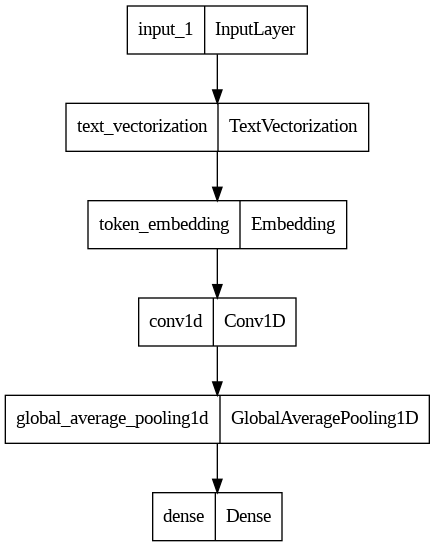

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_1) 

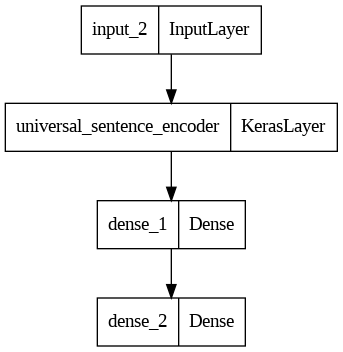

In [ ]:
plot_model(model_2)

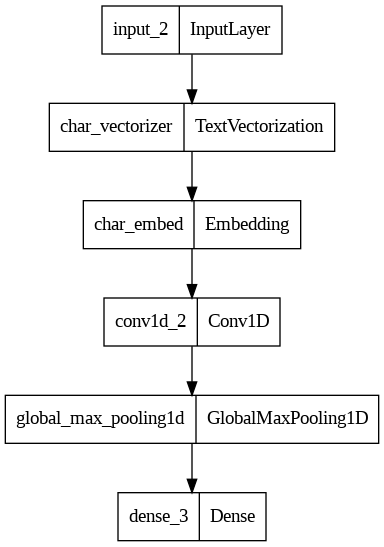

In [ ]:
plot_model(model_3)

##Comparing Model Results 
Since all of our model results are in dictionaries, let's combine them into a pandas DataFrame to visualize them.

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,93.827160,0.880354,0.938272,0.908390
custom_token_embed_conv1d,94.179894,0.927576,0.941799,0.921988
pretrained_token_embed,93.827160,0.880354,0.938272,0.908390
custom_char_embed_conv1d,93.827160,0.880354,0.938272,0.908390


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

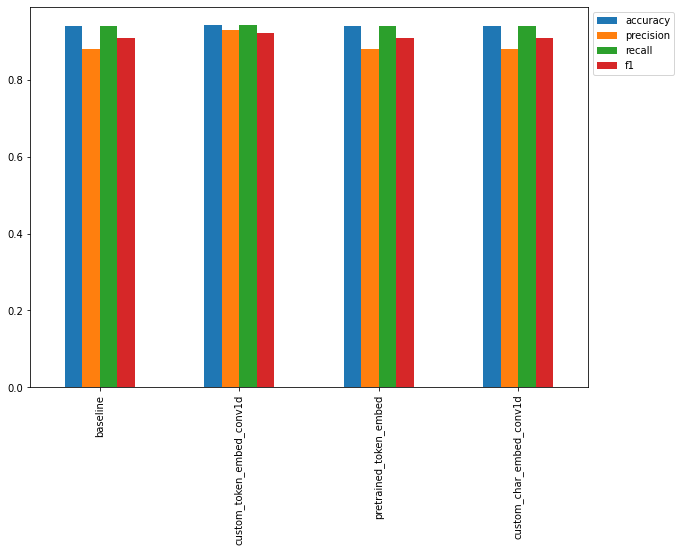

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

### Model : `custom_token_embed_conv1d`, performs slightlty better than other models. 

## Evaluating model on test dataset 


We've already constructed prefetched test dataset. 

In [ ]:
test_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
# Make predictions on the test dataset
test_pred_probs = model_1.predict(test_dataset,
                                       verbose=1)
test_preds = tf.round(test_pred_probs)

10/10 [==============================] - 0s 30ms/step


In [ ]:
# Evaluate loaded model test predictions
test_results = calculate_results(y_true=y_test,
                                              y_pred=test_preds)
test_results

{'accuracy': 92.06349206349206,
 'precision': 0.9270147501658756,
 'recall': 0.9206349206349206,
 'f1': 0.8922341384652941}

## Visualising the Predictions. 

In [ ]:
test_samples = random.sample(test_sentances, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_1.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred : {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 44ms/step
Pred : 1, Prob: 0.9295709729194641
Text:
Love it but the volume could definitely use a boost If it had better built in speakers would definitively be a 5 star They thought ahead and put  an audio auxiliary input so I bought a dedicated speaker for the Echo Proved to be best way to go

----

1/1 [==============================] - 0s 45ms/step
Pred : 1, Prob: 0.9578289985656738
Text:
The sound quality wasn’t great but it was inexpensive

----

1/1 [==============================] - 0s 44ms/step
Pred : 1, Prob: 0.9520091414451599
Text:
I love this fire stick because after installing a few highly recommended apps I discovered that a lot of the channels I dont have with my cable provider is included  and I dont have to pay extra Just subscribing to a few streaming apps will do and I still come out paying way less than cable tv

----

1/1 [==============================] - 0s 48ms/step
Pred : 1, Prob: 0.9692085385322571
Text:
It was easy to